In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
df = pd.read_csv("survey lung cancer.csv")
df.head(4)

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      2           2         YES  
1                    2                      2           2         YES  
2                    2                      1           2          NO  
3                    1                      2           2          NO

In [20]:
# Tarkistetaan sukupuolijakauma
df['GENDER'].value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [22]:
df.isna().sum()
# Huomataan, että null-arvoja ei ole

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [23]:
label_encoder = LabelEncoder()
df_copy = df.copy()
df_copy["GENDER"] = label_encoder.fit_transform(df["GENDER"])
df_copy["LUNG_CANCER"] = label_encoder.fit_transform(df["LUNG_CANCER"])
df_copy.head(6)

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   
5       0   75        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   
5                2         2         2         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2                      2           2            1  
1                    2                      2           2            1  
2                    2                      1           2            0  
3                    1                      2           2            0  
4                    2                      1           1            0  
5                    2                      1           1            1

In [27]:
# Tallennetaan tämä etukäteen lopullista mallintamista varten
classes = label_encoder.classes_
classes

array(['NO', 'YES'], dtype=object)

In [30]:
X = df_copy.drop(columns=['LUNG_CANCER'])
Y = df_copy['LUNG_CANCER']
X.head(3)

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0                    2                      2           2  
1                    2                      2           2  
2                    2                      1           2

In [32]:
Y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int32

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=0)

In [36]:
X_train.shape

(231, 15)

In [41]:
# Skaalataan data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [56]:
# Muutetaan Y_train arvot categorikaaliseksi
Y_train_categorical = to_categorical(Y_train, num_classes=2)
#Y_train_categorical
Y_train_categorical.shape

(231, 2)

In [62]:
# Luodaan neuroverkko
model = Sequential()

input_shape = (X_train.shape[-1], )
output_units = 1  # Tämä 1, koska lopputulos on binäärinen

model.add(Dense(units=32, activation='relu', input_shape=input_shape))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=output_units, activation='softmax'))

In [63]:
# HUOM! Valitse ylempi compile-metodi, jos 
#model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                512       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1601 (6.25 KB)
Trainable params: 1601 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model.fit(x=X_train, y=Y_train, epochs=100, verbose=2)

Epoch 1/100
8/8 - 0s - loss: 0.3519 - accuracy: 0.8745 - 110ms/epoch - 14ms/step
Epoch 2/100
8/8 - 0s - loss: 0.3534 - accuracy: 0.8745 - 16ms/epoch - 2ms/step
Epoch 3/100
8/8 - 0s - loss: 0.3741 - accuracy: 0.8745 - 17ms/epoch - 2ms/step
Epoch 4/100
8/8 - 0s - loss: 0.3446 - accuracy: 0.8745 - 18ms/epoch - 2ms/step
Epoch 5/100
8/8 - 0s - loss: 0.3494 - accuracy: 0.8745 - 18ms/epoch - 2ms/step
Epoch 6/100
8/8 - 0s - loss: 0.3570 - accuracy: 0.8745 - 16ms/epoch - 2ms/step
Epoch 7/100
8/8 - 0s - loss: 0.3228 - accuracy: 0.8745 - 17ms/epoch - 2ms/step
Epoch 8/100
8/8 - 0s - loss: 0.3766 - accuracy: 0.8745 - 16ms/epoch - 2ms/step
Epoch 9/100
8/8 - 0s - loss: 0.3558 - accuracy: 0.8745 - 19ms/epoch - 2ms/step
Epoch 10/100
8/8 - 0s - loss: 0.3310 - accuracy: 0.8745 - 13ms/epoch - 2ms/step
Epoch 11/100
8/8 - 0s - loss: 0.3418 - accuracy: 0.8745 - 15ms/epoch - 2ms/step
Epoch 12/100
8/8 - 0s - loss: 0.3318 - accuracy: 0.8745 - 16ms/epoch - 2ms/step
Epoch 13/100
8/8 - 0s - loss: 0.3062 - accuracy

In [77]:
predictions = model.predict(X_test)
predictions[:5]

3/3 [==============================] - 0s 2ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [78]:
## Lisää tämä, jos käytettiin useampia output-arvoja
#predictions = np.argmax(predictions, axis=-1)
#predictions

In [79]:
# Lasketaan mallin tarkkuus
accuracy_score(Y_test, predictions)

0.8717948717948718

In [81]:
cm = confusion_matrix(Y_test, predictions)
print(cm)

[[ 0 10]
 [ 0 68]]


Text(50.722222222222214, 0.5, 'Actual')

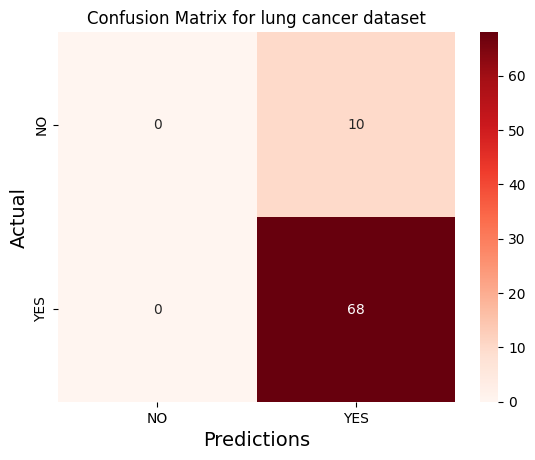

In [86]:
ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Reds',
    # Käytetään aiemmin tallennettua classes-listaa
    xticklabels=classes,
    yticklabels=classes,
)
ax.set_title("Confusion Matrix for lung cancer dataset")
ax.set_xlabel("Predictions", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)